## TOC:
* [Lab | Cleaning numerical data](#first-bullet)
* [Lab | Cleaning categorical data](#second-bullet)
* [Lab | Feature extraction](#third-bullet)


## Lab | Cleaning numerical data <a class="anchor" id="first-bullet"></a>

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, we will take targeted actions to increase profitable customer response, retention, and growth.


1. Import the necessary libraries.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df



In [3]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')


3. First look at its main features (head, shape, info).



In [4]:
display(customer_df.shape)
display(customer_df.head())
display(customer_df.info())


(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

The data has no NaN values

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)



In [5]:
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.columns = customer_df.columns.str.lower()

5. Change effective to date column to datetime format.



In [6]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])   #changing the type of the column to datetime 
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

<AxesSubplot:>

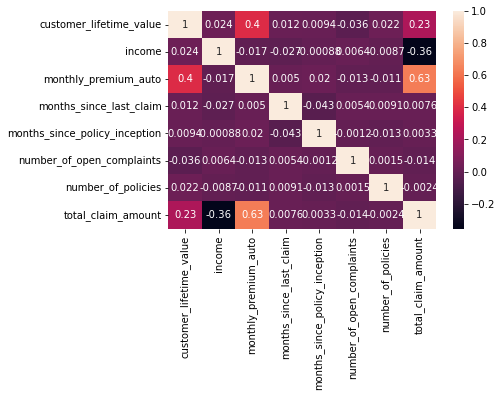

In [7]:
sns.heatmap(customer_df.corr(),annot=True)

We observe no Multicolinearity.

In [8]:
# X , y split
X = customer_df.drop(['total_claim_amount'], axis=1)
y = customer_df['total_claim_amount']

X.select_dtypes(include=['object'])

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

We are goint to define a function that differentiates between continuous and discrete variables. The number of unique values will be useful. We will store continuous data into a continuous_df variable and do the same for discrete_df



In [10]:
#SPLIT NUMERICAL:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num = X_train._get_numeric_data()
print(X_train_num.nunique())
print("-------")
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num = X_test._get_numeric_data()
print(X_test_num.nunique())

customer_lifetime_value          6069
income                           4344
monthly_premium_auto              190
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
dtype: int64
-------
customer_lifetime_value          2160
income                           1581
monthly_premium_auto              146
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
dtype: int64


In [11]:
#We can say discrete vbles are the ones whose range is higher than 100
def cont_discr(df):
    discrete = []
    continuous = []
    for col in df:
        if df[col].nunique() <= 100:
            discrete.append(col)
        else:
            continuous.append(col)
    return discrete,continuous

In [12]:
col_list = cont_discr(X_train_num)

In [13]:
#We select the columns to create a DF with only dicrete variables: 

#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
# df = pd.DataFrame(list_values, columns=list_columns)
X_train_num_dis = X_train_num[col_list[0]]
X_train_num_dis = X_train_num_dis.reset_index().drop(["index"], axis=1)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_dis = X_test_num[col_list[0]]
X_test_num_dis = X_test_num_dis.reset_index().drop(["index"], axis=1)

In [14]:
#We select the columns to create a DF with only continuous variables:

#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num_con = X_train_num.drop(columns = col_list[0], axis=1)
X_train_num_con = X_train_num_con.reset_index()
X_train_num_con = X_train_num_con.reset_index().drop(["level_0",'index'], axis=1)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_con = X_test_num.drop(columns = col_list[0], axis=1)
X_test_num_con = X_test_num_con.reset_index()
X_test_num_con = X_test_num_con.reset_index().drop(["level_0",'index'], axis=1)

8. Create a function to plot every discrete variable.  Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

I will carry this analysis just with the train set as the plots will serve to define both train and test sets 

months_since_last_claim


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


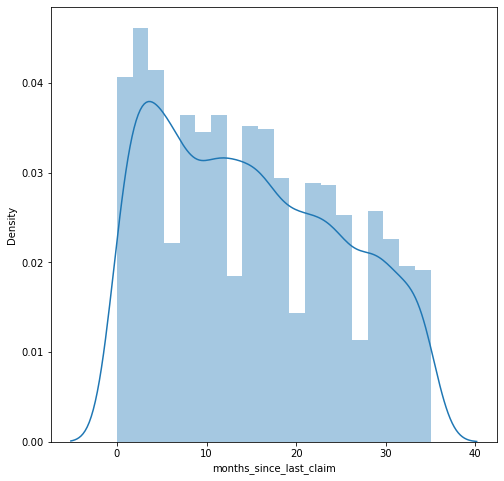

months_since_policy_inception


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


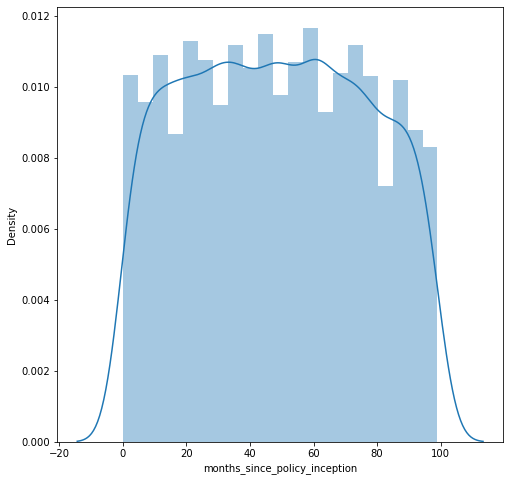

number_of_open_complaints


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


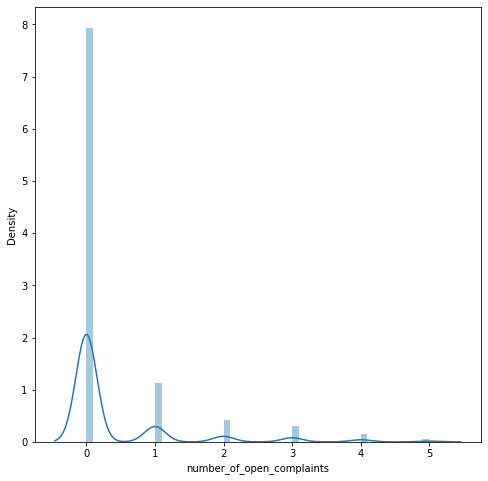

number_of_policies


/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


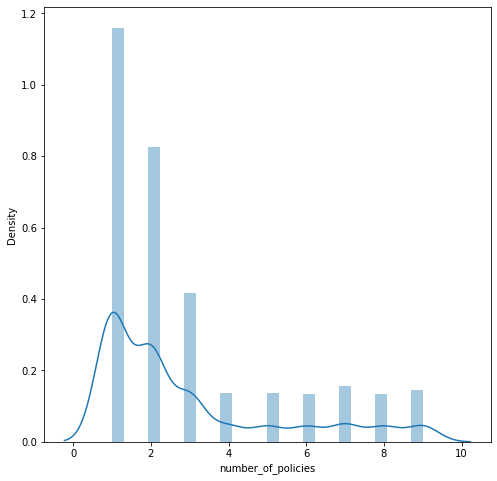

In [15]:
#https://stackoverflow.com/questions/53310228/how-can-i-make-seaborn-distribution-subplots-in-a-loop
plt.rc('figure', figsize=(8,8))  
fig=plt.figure()
def plot_dis(df):
    for i in df.columns:
        print(i)
        sns.distplot(df[i])
        plt.show()
plot_dis(X_train_num_dis)

9. Comment what you can see in the plots.



Discrete Vbles: 

months_since_last_claim: very few outliers

months_since_policy_inception: very few outliers

number_of_open_complaints:
The majority of the observations have 0 open complaints, and then the amount of customers that have 2, 3, 4 complaints reduces consistently.


number_of_policies:
Also shows the majority of customers have only 1 policy and the numebr of customers that have 2,3... reduces as well. NO outliers to nbe taken out.

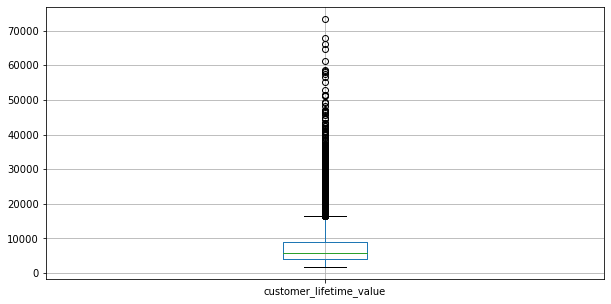

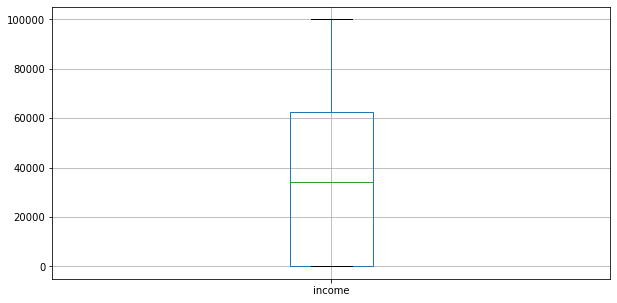

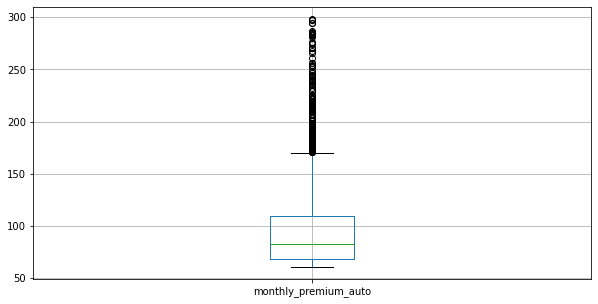

In [16]:
def plot_con(df):
    for col in df.columns:
        plt.figure(figsize=(10,5))
        df.boxplot(col)
plot_con(X_train_num_con)

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)



Continuous variables:

customer_lifetime_value: the plot shows many outliers, but is just skewed, they are relevant, 
I will take out just the most extreme ones (10%)

income: very few outliers 

monthly_premium_aut: many outliers 

total_claim_amount: many outliers 

11. Did you find outliers?  Comment what you will do with them.



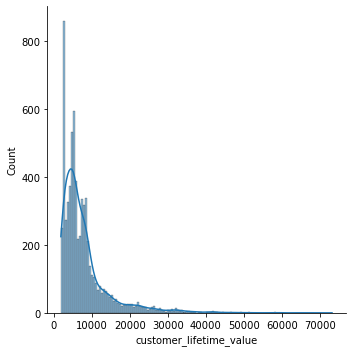

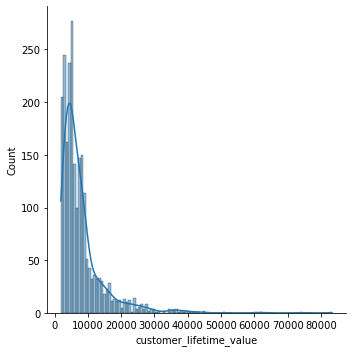

count     2284.000000
mean      7911.028569
std       6835.026039
min       1898.683686
25%       3954.344534
50%       5695.460667
75%       8889.083080
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [17]:
#Customer_lifetime_value: the plot shows many outliers, but is just skewed, they are relevant, 
#I will take out just the most extreme ones (10%)

#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num_con[['customer_lifetime_value']].describe()
sns.displot(X_train_num_con['customer_lifetime_value'],kde=True)
plt.show()
X_train_num_con['customer_lifetime_value'].describe()
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_con[['customer_lifetime_value']].describe()
sns.displot(X_test_num_con['customer_lifetime_value'],kde=True)
plt.show()
X_test_num_con['customer_lifetime_value'].describe()

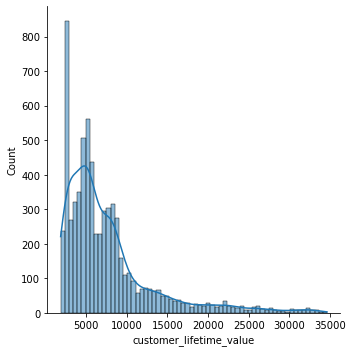

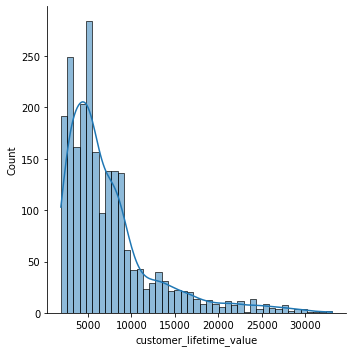

count     2251.000000
mean      7405.094462
std       5272.690188
min       1898.683686
25%       3923.840865
50%       5619.068508
75%       8727.878829
max      33053.268690
Name: customer_lifetime_value, dtype: float64

In [18]:
# PERCENTILE 95
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
iqr = np.percentile(X_train_num_con['customer_lifetime_value'],90) - np.percentile(X_train_num_con['customer_lifetime_value'],10)
upper_limit = np.percentile(X_train_num_con['customer_lifetime_value'],90) + 1.5*iqr
lower_limit = np.percentile(X_train_num_con['customer_lifetime_value'],10) - 1.5*iqr

X_train_num_con = X_train_num_con[(X_train_num_con['customer_lifetime_value']>lower_limit) & (X_train_num_con['customer_lifetime_value']<upper_limit)].copy()
sns.displot(X_train_num_con['customer_lifetime_value'],kde=True)
plt.show()
X_train_num_con['customer_lifetime_value'].describe()
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
iqr = np.percentile(X_test_num_con['customer_lifetime_value'],90) - np.percentile(X_test_num_con['customer_lifetime_value'],10)
upper_limit = np.percentile(X_test_num_con['customer_lifetime_value'],90) + 1.5*iqr
lower_limit = np.percentile(X_test_num_con['customer_lifetime_value'],10) - 1.5*iqr

X_test_num_con = X_test_num_con[(X_test_num_con['customer_lifetime_value']>lower_limit) & (X_test_num_con['customer_lifetime_value']<upper_limit)].copy()
sns.displot(X_test_num_con['customer_lifetime_value'],kde=True)
plt.show()
X_test_num_con['customer_lifetime_value'].describe()

The 95% percentile is still around 35.000 value so its a good thing we still keep the chunck of the data

monthly_premium_auto: many outliers 

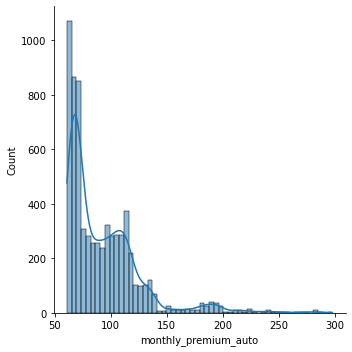

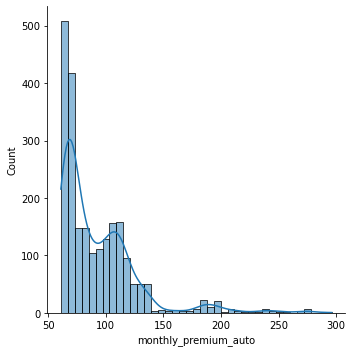

count    2251.000000
mean       92.571302
std        34.434319
min        61.000000
25%        68.000000
50%        82.000000
75%       108.000000
max       296.000000
Name: monthly_premium_auto, dtype: float64

In [19]:
# monthly_premium_auto: the plot does not show outliers, is just a bit  skewed.
#With the scaling will be enough 
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num_con[['monthly_premium_auto']].describe()
sns.displot(X_train_num_con['monthly_premium_auto'],kde=True)
plt.show()
X_train_num_con['monthly_premium_auto'].describe()
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_con[['monthly_premium_auto']].describe()
sns.displot(X_test_num_con['monthly_premium_auto'],kde=True)
plt.show()
X_test_num_con['monthly_premium_auto'].describe()

12. Check all columns for NaN values.  Decide what (if anything) you will need to do with them.



In [20]:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
print(X_train_num_con.isnull().sum())
print(X_train_num_dis.isnull().sum())
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
print(X_test_num_con.isnull().sum())
print(X_test_num_dis.isnull().sum())

customer_lifetime_value    0
income                     0
monthly_premium_auto       0
dtype: int64
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64
customer_lifetime_value    0
income                     0
monthly_premium_auto       0
dtype: int64
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64


NORMALISING DISCRETE VBLES WITH MinMaxScaler

In [21]:
#We only fit the train set in the transformer:
transformer = MinMaxScaler().fit(X_train_num_dis)
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num_dis_norm = transformer.transform(X_train_num_dis)
X_train_num_d_n= pd.DataFrame(X_train_num_dis_norm, columns=X_train_num_dis.columns)

#TEST ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_dis_norm = transformer.transform(X_test_num_dis)
X_test_num_d_n= pd.DataFrame(X_test_num_dis_norm, columns=X_test_num_dis.columns)


NORMALISING CONTINUOUS VBLES WITH StandardScaler 

In [22]:
#We only fit the train set in the transformer:
transformer = StandardScaler().fit(X_train_num_con)
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_num_con_st= transformer.transform(X_train_num_con)
X_train_num_c_st= pd.DataFrame(X_train_num_con_st, columns=X_train_num_con.columns)
#TEST ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_num_con_st= transformer.transform(X_test_num_con)
X_test_num_c_st= pd.DataFrame(X_test_num_con_st, columns=X_test_num_con.columns)

In [23]:
X_train_num_c_st

,customer_lifetime_value,income,monthly_premium_auto
0,-0.240202,-0.251469,1.991800
1,-0.364504,-1.241372,2.860751
2,1.981829,-1.241372,2.411294
3,2.041228,0.041918,-0.734911
4,-0.375031,-0.150178,-0.674983
...,...,...,...
6767,0.926827,-0.382613,0.793246
6768,-0.007169,0.227110,-0.824802
6769,-0.300969,1.876805,-0.585092
6770,-0.405984,0.576321,-0.764875


In [24]:
X_train_num_d_n

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.571429,0.717172,0.0,0.000
1,0.142857,0.616162,0.8,0.000
2,0.685714,0.212121,0.0,0.125
3,0.285714,0.555556,0.0,0.125
4,0.257143,0.808081,0.0,1.000
...,...,...,...,...
6845,0.342857,0.515152,0.0,0.125
6846,0.714286,0.535354,0.0,0.125
6847,0.428571,0.686869,0.0,0.750
6848,0.285714,0.717172,0.0,0.250


NOW I CONCATENATE THE 2 DF IN 1 NUMERICAL PROCESSED

In [25]:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_num_train = pd.concat([X_train_num_d_n, X_train_num_c_st], axis=1)
#TEST ++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_num_test = pd.concat([X_test_num_d_n, X_test_num_c_st], axis=1)

In [26]:
#There are some NaN values, due to the outliers I took off
print(data_num_train.isna().sum())
print(data_num_test.isna().sum())

months_since_last_claim           0
months_since_policy_inception     0
number_of_open_complaints         0
number_of_policies                0
customer_lifetime_value          78
income                           78
monthly_premium_auto             78
dtype: int64
months_since_last_claim           0
months_since_policy_inception     0
number_of_open_complaints         0
number_of_policies                0
customer_lifetime_value          33
income                           33
monthly_premium_auto             33
dtype: int64


I will fill NaNs as follows: 






In [27]:
#makes sense fill with the mean 
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_num_train['customer_lifetime_value'].fillna((data_num_train['customer_lifetime_value'].mean()), inplace=True)
data_num_train['income'].fillna((data_num_train['income'].mean()), inplace=True)
data_num_train['monthly_premium_auto'].fillna((data_num_train['monthly_premium_auto'].mean()), inplace=True)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_num_test['customer_lifetime_value'].fillna((data_num_test['customer_lifetime_value'].mean()), inplace=True)
data_num_test['income'].fillna((data_num_test['income'].mean()), inplace=True)
data_num_test['monthly_premium_auto'].fillna((data_num_test['monthly_premium_auto'].mean()), inplace=True)

## Lab | Cleaning categorical data<a class="anchor" id="second-bullet"></a>

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data.


1. Import the necessary libraries if you are starting a new notebook.
Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv




2. Find  all of the categorical data.  Save it in a categorical_df variable.

In [28]:
#SPLIT CATEGORICAL:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat = X_train_cat.reset_index(drop = True)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat = X_test_cat.reset_index(drop = True)

3. Check for NaN values.



In [29]:
print(X_train_cat.isnull().any())
print(X_test_cat.isnull().any())

customer            False
state               False
response            False
coverage            False
education           False
employmentstatus    False
gender              False
location_code       False
marital_status      False
policy_type         False
policy              False
renew_offer_type    False
sales_channel       False
vehicle_class       False
vehicle_size        False
dtype: bool
customer            False
state               False
response            False
coverage            False
education           False
employmentstatus    False
gender              False
location_code       False
marital_status      False
policy_type         False
policy              False
renew_offer_type    False
sales_channel       False
vehicle_class       False
vehicle_size        False
dtype: bool


In [30]:
#reset index:
X_train_cat = X_train_cat.reset_index(drop = True)
X_test_cat = X_test_cat.reset_index(drop = True)

5. Check dtypes. Do they all make sense as categorical data?



In [31]:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
display(X_train_cat)
display(X_train_cat.dtypes)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
display(X_test_cat)
display(X_test_cat.dtypes)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,CC30924,Oregon,No,Premium,College,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer4,Agent,Sports Car,Small
1,MP85571,Arizona,No,Premium,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L2,Offer3,Agent,SUV,Medsize
2,FM54600,Washington,No,Premium,High School or Below,Unemployed,F,Suburban,Single,Corporate Auto,Corporate L2,Offer2,Branch,SUV,Medsize
3,WW31823,Oregon,No,Basic,High School or Below,Employed,F,Suburban,Married,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Small
4,RJ80405,Arizona,No,Basic,Bachelor,Employed,M,Suburban,Married,Personal Auto,Personal L1,Offer3,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845,GA98025,Arizona,No,Basic,Bachelor,Retired,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Call Center,SUV,Medsize
6846,EW27959,California,No,Basic,Bachelor,Employed,F,Urban,Single,Personal Auto,Personal L2,Offer1,Web,Four-Door Car,Medsize
6847,KP97208,Oregon,No,Basic,College,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer1,Agent,Two-Door Car,Medsize
6848,QK88438,Arizona,No,Basic,College,Employed,F,Rural,Single,Personal Auto,Personal L3,Offer2,Agent,Four-Door Car,Medsize


customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,XP92021,Oregon,No,Basic,High School or Below,Employed,F,Suburban,Divorced,Personal Auto,Personal L1,Offer1,Call Center,SUV,Medsize
1,XY52165,Arizona,No,Basic,College,Employed,F,Suburban,Married,Personal Auto,Personal L1,Offer1,Branch,Two-Door Car,Medsize
2,QJ65472,California,No,Premium,High School or Below,Medical Leave,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Small
3,SG20925,Washington,No,Basic,Master,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer1,Call Center,Four-Door Car,Medsize
4,SK12752,California,Yes,Basic,Bachelor,Unemployed,F,Suburban,Single,Corporate Auto,Corporate L3,Offer1,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,DP23630,California,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Large
2280,FH39423,Oregon,No,Basic,Master,Employed,F,Rural,Married,Personal Auto,Personal L2,Offer2,Call Center,Four-Door Car,Medsize
2281,BS53322,California,No,Basic,High School or Below,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Call Center,SUV,Small
2282,HJ79774,Oregon,No,Basic,College,Employed,F,Urban,Married,Corporate Auto,Corporate L1,Offer3,Branch,Four-Door Car,Medsize


customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

NO.

policy,   policy_type,  vehicle_class  and customer have stings with numerical or just stings with 2 diff info

6. Does any column contain alpha and numeric data?  Decide how to clean it.



categorical_df['customer'] but is a customer_id.

I have checked the diff rows and they are all diff values (1 value per row) so its like a reg-number or name_id and they are all unique so makes no sense to treat them, so i drop the Customer column.

I decide to drop Response as doesnt add info to the data set 

In [32]:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat.drop("customer", axis=1, inplace=True)
X_train_cat.drop("response", axis=1, inplace=True)
#TEST  ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat.drop("customer", axis=1, inplace=True)
X_test_cat.drop("response", axis=1, inplace=True)


7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions.


The processing I would do, is required in the next questions, like reducing the number of unique values by grouping, ....


8. Compare policy_type and policy.  What information is contained in these columns.  Can you identify what is important?  


In [33]:
X_train_cat['policy_type'].value_counts()

Personal Auto     5094
Corporate Auto    1472
Special Auto       284
Name: policy_type, dtype: int64

Nothing to do as we cant group the values more than they are

We can split policy and keep  as policy_type as per the info found about L1, L2, L3 in https://link.springer.com/article/10.1057/gpp.2010.5

"In selected countries, third-party liability covers a third party inside or outside the vehicle; it covers property damage (L1) or bodily injury (L2). The coverage for bodily injury due to an intoxicated driver (L3) is included in L2. Spousal liability (L4) covers the liability of death or injury to the spouse.

They refer to the level of coverage of the policy. 

I am going to strip the type of policy as that inifo already appears in policy type 

In [34]:
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
# new data frame with split value columns
new = X_train_cat['policy'].str.split(" ", n = 1, expand = True)
# # making separate last name column from new data frame
X_train_cat["policy_coverage"]= new[1]
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
new2 = X_test_cat['policy'].str.split(" ", n = 1, expand = True)
# # making separate last name column from new data frame
X_test_cat["policy_coverage"]= new2[1]

In [35]:
# Dropping policy column
X_train_cat.drop(columns =['policy'], inplace = True, axis=1)
X_test_cat.drop(columns =['policy'], inplace = True, axis=1)


9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.

In [36]:
X_train_cat['state'].value_counts()

California    2355
Oregon        1972
Arizona       1263
Nevada         660
Washington     600
Name: state, dtype: int64

In [37]:
# OneHotEncoder [['state']]
encoder = OneHotEncoder(drop='first').fit(X_train_cat[['state']])
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded = encoder.transform(X_train_cat[['state']]).toarray() 
state_OH_tr = pd.DataFrame(encoded,columns=["California","Oregon", 'Arizona','Nevada']) 
X_train_cat.drop(columns =['state'], inplace = True, axis=1)
X_train_cat = pd.concat([X_train_cat, state_OH_tr], axis=1)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded = encoder.transform(X_test_cat[['state']]).toarray() 
state_OH_te = pd.DataFrame(encoded,columns=["California","Oregon", 'Arizona','Nevada']) 
X_test_cat.drop(columns =['state'], inplace = True, axis=1)
X_test_cat = pd.concat([X_test_cat, state_OH_te], axis=1)

In [38]:
# Ordinal Encoder [["coverage"]]
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["coverage"] = X_train_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat["coverage"] = X_test_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [39]:
X_train_cat["education"].value_counts()

Bachelor                2088
College                 1989
High School or Below    1954
Master                   569
Doctor                   250
Name: education, dtype: int64

In [40]:
# Here we could , first group in "High Scool or below" , "College", and "Graduate or higher" 
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["education"] = np.where(X_train_cat["education"].isin(['Bachelor','Master','Doctor']), 'Graduate or higher', X_train_cat["education"])
#TEST  ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat["education"] = np.where(X_test_cat["education"].isin(['Bachelor','Master','Doctor']), 'Graduate or higher', X_test_cat["education"])

In [41]:
X_train_cat["education"].value_counts()

Graduate or higher      2907
College                 1989
High School or Below    1954
Name: education, dtype: int64

In [42]:
# OneHotEncoder  [['education']]
encoder = OneHotEncoder(drop='first').fit(X_train_cat[['education']])
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded = encoder.transform(X_train_cat[['education']]).toarray() 
edu_OH_tr = pd.DataFrame(encoded,columns=["Graduate or higher","College"]) 
X_train_cat.drop(columns =['education'], inplace = True, axis=1)
X_train_cat = pd.concat([X_train_cat, edu_OH_tr], axis=1)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded = encoder.transform(X_test_cat[['education']]).toarray() 
edu_OH_te = pd.DataFrame(encoded,columns=["Graduate or higher","College"]) 
X_test_cat.drop(columns =['education'], inplace = True, axis=1)
X_test_cat = pd.concat([X_test_cat, edu_OH_te], axis=1)

In [43]:
X_train_cat["employmentstatus"].value_counts()
#Here we could regroup in. Employed / UNEMPLOYED  and UNABLE

Employed         4294
Unemployed       1731
Medical Leave     326
Disabled          294
Retired           205
Name: employmentstatus, dtype: int64

In [44]:
#Ordinal Encoder [["employmentstatus"]]
#TRAIN  +++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["employmentstatus"] = np.where(X_train_cat["employmentstatus"].isin(['Medical Leave','Disabled','Retired']), 'Unable', X_train_cat["employmentstatus"])
X_train_cat["employmentstatus"] = X_train_cat["employmentstatus"].map({"Unable" : 0, "Unemployed" : 1, "Employed" : 2})
#TEST  ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat["employmentstatus"] = np.where(X_test_cat["employmentstatus"].isin(['Medical Leave','Disabled','Retired']), 'Unable', X_test_cat["employmentstatus"])
X_test_cat["employmentstatus"] = X_test_cat["employmentstatus"].map({"Unable" : 0, "Unemployed" : 1, "Employed" : 2})


In [45]:
X_test_cat["gender"].value_counts()

F    1183
M    1101
Name: gender, dtype: int64

In [46]:
# LabelEncoder [["gender"]]
label_encoded_tr = LabelEncoder().fit(X_train_cat["gender"]).transform(X_train_cat["gender"]) 
#TRAIN  +++++++++++++++++++++++++++++++++++++++++++++++++++++
gen_label_tr = pd.DataFrame(label_encoded_tr,columns=["gender"])
X_train_cat.drop(columns =['gender'], inplace = True, axis=1)
X_train_cat = pd.concat([X_train_cat, gen_label_tr], axis=1)

#TEST   +++++++++++++++++++++++++++++++++++++++++++++++++++++
label_encoded_ts = LabelEncoder().fit(X_test_cat["gender"]).transform(X_test_cat["gender"]) 
gen_label_ts = pd.DataFrame(label_encoded_ts,columns=["gender"])
X_test_cat.drop(columns =['gender'], inplace = True, axis=1)
X_test_cat = pd.concat([X_test_cat, gen_label_ts], axis=1)

In [47]:
# OneHotEncoder: [['marital_status']]
encoder = OneHotEncoder(drop='first').fit(X_train_cat[['marital_status']])
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded_tr = encoder.transform(X_train_cat[['marital_status']]).toarray() 
mar_OH_tr = pd.DataFrame(encoded_tr,columns=["Married","Single "]) 
X_train_cat.drop(columns =['marital_status'], inplace = True, axis=1)
X_train_cat = pd.concat([X_train_cat, mar_OH_tr], axis=1)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded_ts = encoder.transform(X_test_cat[['marital_status']]).toarray() 
mar_OH_ts = pd.DataFrame(encoded_ts,columns=["Married","Single "]) 
X_test_cat.drop(columns =['marital_status'], inplace = True, axis=1)
X_test_cat = pd.concat([X_test_cat, mar_OH_ts], axis=1)

In [48]:
X_train_cat["renew_offer_type"].value_counts()

Offer1    2825
Offer2    2176
Offer3    1062
Offer4     787
Name: renew_offer_type, dtype: int64

In [49]:
#OneHotEncoder [['renew_offer_type']]
encoder = OneHotEncoder(drop='first').fit(X_train_cat[['renew_offer_type']])  
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded_tr = encoder.transform(X_train_cat[['renew_offer_type']]).toarray() 
offer_oh = pd.DataFrame(encoded_tr,columns=["Offer1","Offer2","Offer3"])
X_train_cat.drop(columns =['renew_offer_type'], inplace = True, axis=1)
X_train_cat = pd.concat([X_train_cat, offer_oh], axis=1)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded_ts = encoder.transform(X_test_cat[['renew_offer_type']]).toarray() 
offer_oh = pd.DataFrame(encoded_ts,columns=["Offer1","Offer2","Offer3"])
X_test_cat.drop(columns =['renew_offer_type'], inplace = True, axis=1)
X_test_cat = pd.concat([X_test_cat, offer_oh], axis=1)

In [50]:
X_test_cat["sales_channel"].value_counts()

Agent          858
Branch         625
Call Center    459
Web            342
Name: sales_channel, dtype: int64

In [51]:
X_test_cat


,coverage,employmentstatus,location_code,policy_type,sales_channel,vehicle_class,vehicle_size,policy_coverage,California,Oregon,Arizona,Nevada,Graduate or higher,College,gender,Married,Single,Offer1,Offer2,Offer3
0,0,2,Suburban,Personal Auto,Call Center,SUV,Medsize,L1,0.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0
1,0,2,Suburban,Personal Auto,Branch,Two-Door Car,Medsize,L1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0
2,2,0,Suburban,Personal Auto,Agent,Four-Door Car,Small,L2,1.0,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0
3,0,2,Rural,Personal Auto,Call Center,Four-Door Car,Medsize,L3,0.0,0.0,0.0,1.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0.0
4,0,1,Suburban,Corporate Auto,Web,Two-Door Car,Medsize,L3,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,0,1,Suburban,Personal Auto,Agent,Four-Door Car,Large,L3,1.0,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0
2280,0,2,Rural,Personal Auto,Call Center,Four-Door Car,Medsize,L2,0.0,0.0,1.0,0.0,1.0,0.0,0,1.0,0.0,1.0,0.0,0.0
2281,0,2,Urban,Personal Auto,Call Center,SUV,Small,L3,1.0,0.0,0.0,0.0,0.0,1.0,0,1.0,0.0,1.0,0.0,0.0
2282,0,2,Urban,Corporate Auto,Branch,Four-Door Car,Medsize,L1,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0


In [52]:
#OneHotEncoder [['sales_channel']]
encoder = OneHotEncoder(drop='first').fit(X_train_cat[["sales_channel"]])  
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded_tr = encoder.transform(X_train_cat[["sales_channel"]]).toarray() 
sales_oh = pd.DataFrame(encoded_tr,columns=["Agent","Branch","Call Center"])
X_train_cat.drop(columns =['sales_channel'], inplace = True, axis=1)
X_train_cat = pd.concat([X_train_cat, sales_oh], axis=1)
#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
encoded_ts = encoder.transform(X_test_cat[['sales_channel']]).toarray() 
sales_oh = pd.DataFrame(encoded_ts,columns=["Agent","Branch","Call Center"])
X_test_cat.drop(columns =['sales_channel'], inplace = True, axis=1)
X_test_cat = pd.concat([X_test_cat, sales_oh], axis=1)

In [54]:
X_test_cat["vehicle_class"].value_counts()

Four-Door Car    1127
Two-Door Car      498
SUV               452
Sports Car        114
Luxury SUV         47
Luxury Car         46
Name: vehicle_class, dtype: int64

In [55]:
# We can join cars (2 and 4 doors) and luxury and leave just car and SUV
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["vehicle_class"] = np.where(X_train_cat["vehicle_class"].isin(['Four-Door Car','Two-Door Car', 'Luxury Car','Sports Car' ]),
                                           'Car', X_train_cat["vehicle_class"])
X_train_cat["vehicle_class"] = np.where(X_train_cat["vehicle_class"].isin(['Luxury SUV']),
                                           'SUV', X_train_cat["vehicle_class"])

#TEST +++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat["vehicle_class"] = np.where(X_test_cat["vehicle_class"].isin(['Four-Door Car','Two-Door Car', 'Luxury Car','Sports Car' ]),
                                           'Car', X_test_cat["vehicle_class"])
X_test_cat["vehicle_class"] = np.where(X_test_cat["vehicle_class"].isin(['Luxury SUV']),
                                           'SUV', X_test_cat["vehicle_class"])


In [56]:
X_test_cat["vehicle_class"].value_counts()

Car    1785
SUV     499
Name: vehicle_class, dtype: int64

In [57]:
#LabelEncoder [["vehicle_class"]]
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
label_encoded = LabelEncoder().fit(X_train_cat["vehicle_class"]).transform(X_train_cat["vehicle_class"]) 
vehi_le_tr = pd.DataFrame(label_encoded,columns=["vehicle_class"])
X_train_cat.drop(columns =['vehicle_class'], inplace = True, axis=1)
X_train_cat = pd.concat([X_train_cat, vehi_le_tr], axis=1)
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
label_encoded = LabelEncoder().fit(X_test_cat["vehicle_class"]).transform(X_test_cat["vehicle_class"]) 
vehi_le_ts = pd.DataFrame(label_encoded,columns=["vehicle_class"])
X_test_cat.drop(columns =['vehicle_class'], inplace = True, axis=1)
X_test_cat = pd.concat([X_test_cat, vehi_le_ts], axis=1)

In [58]:
X_train_cat["vehicle_size"].value_counts()

Medsize    4862
Small      1282
Large       706
Name: vehicle_size, dtype: int64

In [59]:
# Ordinal Encoder [["vehicle_size"]]
scale_mapper = {"Small":1, "Medsize":2, "Large":3}
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["vehicle_size"] = X_train_cat[["vehicle_size"]].replace(scale_mapper)
vehi_size_ord_tr = X_train_cat["vehicle_size"]
#TEST ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat["vehicle_size"] = X_test_cat[["vehicle_size"]].replace(scale_mapper)
vehi_size_ord_ts = X_test_cat["vehicle_size"]

In [60]:
X_train_cat["location_code"].value_counts()

Suburban    4322
Rural       1345
Urban       1183
Name: location_code, dtype: int64

In [61]:
# Ordinal Encoder [["location_code"]] As for the insurance company is m0re risky urban than rural 
scale_mapper = {"Rural":1, "Suburban":2, "Urban":3}
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["location_code"] = X_train_cat[["location_code"]].replace(scale_mapper)
vehi_size_ord_tr = X_train_cat["location_code"]
#TEST ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat["location_code"] = X_test_cat[["location_code"]].replace(scale_mapper)
vehi_size_ord_ts = X_test_cat["location_code"]

In [62]:
X_test_cat["policy_type"].value_counts()

Personal Auto     1694
Corporate Auto     496
Special Auto        94
Name: policy_type, dtype: int64

In [63]:
# Ordinal Encoder [["policy_type"]] As for the insurance company, corporate and special are higher value
scale_mapper = {"Personal Auto":1, "Corporate Auto":2, "Special Auto":3}
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["policy_type"] = X_train_cat[["policy_type"]].replace(scale_mapper)
pol_ty_ord_tr = X_train_cat["policy_type"]
#TEST ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat["policy_type"] = X_test_cat[["policy_type"]].replace(scale_mapper)
pol_ty_ord_ts = X_test_cat["policy_type"]

In [64]:
X_train_cat["policy_coverage"].value_counts()

L3    3434
L2    2171
L1    1245
Name: policy_coverage, dtype: int64

"In selected countries, third-party liability covers a third party inside or outside the vehicle; it covers property damage (L1) or bodily injury (L2). The coverage for bodily injury due to an intoxicated driver (L3) is included in L2. Spousal liability (L4) covers the liability of death or injury to the spouse.



In [75]:
# Ordinal Encoder [["policy_coverage"]] As for the insurance company L1 property damage, L2 body injury , L3 DUI 
scale_mapper = {"L3":1, "L2":2, "L1":3}
#TRAIN ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_train_cat["policy_coverage"] = X_train_cat[["policy_coverage"]].replace(scale_mapper)
pol_co_ord_tr = X_train_cat["policy_type"]
#TEST ++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test_cat["policy_coverage"] = X_test_cat[["policy_coverage"]].replace(scale_mapper)
pol_co_ord_ts = X_test_cat["policy_coverage"]

In [76]:
X_train_cat.reset_index()
X_test_cat.reset_index()
data_num_train.reset_index()
data_num_test.reset_index()

,index,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto
0,0,0.028571,0.020202,0.0,0.125,1.000948,0.994506,0.523571
1,1,0.200000,0.505051,0.0,0.000,-0.812382,1.341416,-0.555128
2,2,0.485714,0.080808,0.0,0.125,3.813472,-0.300685,0.643426
3,3,0.457143,0.252525,0.2,0.500,-0.430244,2.027444,-0.854766
4,4,1.000000,0.525253,0.6,0.500,-0.557801,-1.241372,-0.585092
...,...,...,...,...,...,...,...,...
2279,2279,0.171429,0.191919,0.0,0.125,-0.038590,-0.016672,0.001340
2280,2280,0.428571,0.434343,0.0,0.375,-0.038590,-0.016672,0.001340
2281,2281,0.514286,0.474747,0.0,0.125,-0.038590,-0.016672,0.001340
2282,2282,0.485714,0.656566,0.8,0.000,-0.038590,-0.016672,0.001340


In [78]:
data_train = pd.concat([X_train_cat, data_num_train], axis=1)
data_test = pd.concat([X_test_cat, data_num_test], axis=1)

In [79]:
data_train.isna().sum()

coverage                         0
employmentstatus                 0
location_code                    0
policy_type                      0
vehicle_size                     0
policy_coverage                  0
California                       0
Oregon                           0
Arizona                          0
Nevada                           0
Graduate or higher               0
College                          0
gender                           0
Married                          0
Single                           0
Offer1                           0
Offer2                           0
Offer3                           0
Agent                            0
Branch                           0
Call Center                      0
vehicle_class                    0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
customer_lifetime_value          0
income                           0
monthly_premium_auto

In [80]:
data_test.isna().sum()

coverage                         0
employmentstatus                 0
location_code                    0
policy_type                      0
vehicle_size                     0
policy_coverage                  0
California                       0
Oregon                           0
Arizona                          0
Nevada                           0
Graduate or higher               0
College                          0
gender                           0
Married                          0
Single                           0
Offer1                           0
Offer2                           0
Offer3                           0
Agent                            0
Branch                           0
Call Center                      0
vehicle_class                    0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
customer_lifetime_value          0
income                           0
monthly_premium_auto

In [104]:
!git add . 
